In [4]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
import seaborn as sns
from matplotlib import pyplot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
import struct

Carga el fichero directamente desde el directorio de GitHub

In [5]:
url = "https://raw.githubusercontent.com/DanielCarrascoPerez/AAMD/main/Trabajo1/day.csv"

In [6]:
dataset = read_csv(url)

Con la función .isnull() podemos ver si hay datos vacios o no. Como se puede apreciar a continuación, todos los datos han sido rellenados.

In [7]:
print("Missing values: ", dataset.isnull().sum().sum())
print(dataset.isnull().any())

Missing values:  0
instant       False
dteday        False
season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool


He identificado un valor numérico nulo que pandas no identifica. Esto es en la línea 70 de la columna *hum*. A continuación, elimino dicha fila para que no afecte al dataset.

In [8]:
#print(len(dataset))
dataset = dataset.drop(69)
#print(len(dataset))

Ahora vamos a formalizar los datos para poder leer los datos de forma más natural.

In [9]:
dataset['temp'] = round(dataset['temp'].apply(lambda x: x*41),2)
print(dataset['temp'])
dataset['atemp'] = round(dataset['atemp'].apply(lambda x: x*50),2)
print(dataset['atemp'])
dataset['hum'] = round(dataset['hum'].apply(lambda x: x*100),2)
print(dataset['hum'])
dataset['windspeed'] = round(dataset['windspeed'].apply(lambda x: x*67),2)
print(dataset['windspeed'])

dataset.temp = dataset.temp.astype(int)
#print(dataset['temp'])
dataset.atemp = dataset.atemp.astype(int)
#print(dataset['atemp'])
dataset.hum = dataset.hum.astype(int)
#print(dataset['hum'])
dataset.windspeed = dataset.windspeed.astype(int)
#print(dataset['windspeed'])

0      14.11
1      14.90
2       8.05
3       8.20
4       9.31
       ...  
726    10.42
727    10.39
728    10.39
729    10.49
730     8.85
Name: temp, Length: 730, dtype: float64
0      18.18
1      17.69
2       9.47
3      10.61
4      11.46
       ...  
726    11.33
727    12.75
728    12.12
729    11.58
730    11.17
Name: atemp, Length: 730, dtype: float64
0      80.58
1      69.61
2      43.73
3      59.04
4      43.70
       ...  
726    65.29
727    59.00
728    75.29
729    48.33
730    57.75
Name: hum, Length: 730, dtype: float64
0      10.75
1      16.65
2      16.64
3      10.74
4      12.52
       ...  
726    23.46
727    10.42
728     8.33
729    23.50
730    10.37
Name: windspeed, Length: 730, dtype: float64


La función .shape muestra el número de filas y columnas del dataset.

In [10]:
print(dataset.shape)

(730, 16)


La función .head() muestra las primeras 3 instancias del dataset.

In [11]:
print(dataset.head(3))

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   

   weathersit  temp  atemp  hum  windspeed  casual  registered   cnt  
0           2    14     18   80         10     331         654   985  
1           2    14     17   69         16     131         670   801  
2           1     8      9   43         16     120        1229  1349  


A continuación, se muestra una descripción de todas las columnas del dataset.

In [12]:
print(dataset.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   366.405479    2.498630    0.501370    6.524658    0.028767    2.994521   
std    211.025629    1.110184    0.500341    3.451815    0.167266    2.004788   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    184.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.500000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   19.823288   23.223288   62.310959   12.275342   
std      0.465405    0.5448

La función .groupby() agrupa los datos según la columna que se le indica y .size() cuenta cuantas instancias hay de cada.

In [13]:
print(dataset.groupby('cnt').size())

cnt
22      1
431     1
441     1
506     1
605     1
       ..
8294    1
8362    1
8395    1
8555    1
8714    1
Length: 696, dtype: int64


A continuación, se muestra la cantidad de alquieres hechos por estación del año.

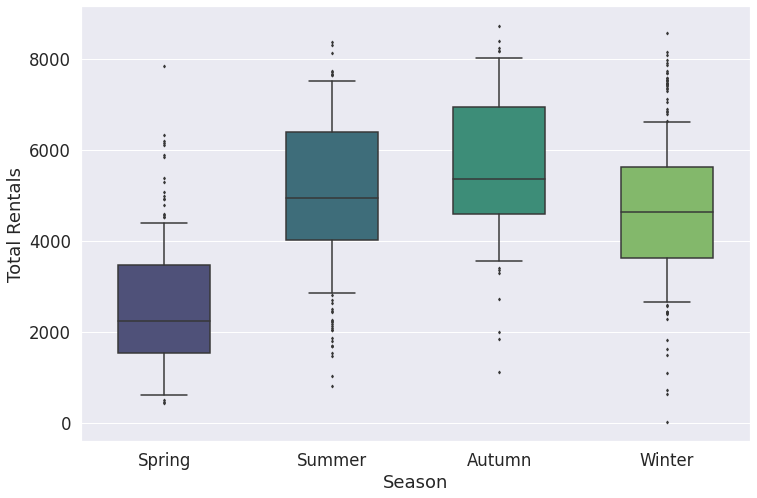

In [14]:
#darkgrid, whitegrid, dark, white, ticks
sns.set_style("darkgrid")
#paper, notebook, talk, poster
sns.set_context("notebook", font_scale=1.5)
pyplot.figure(figsize=(12,8))
ax = sns.boxplot(x="season", y="cnt", data=dataset, width=.55, whis=.5, saturation=.6, fliersize=2,
             notch=False, palette='viridis')
pyplot.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Autumn', 'Winter'])
ax.set_xlabel("Season")
ax.set_ylabel("Total Rentals")
pyplot.show()

Lo mismo, pero por día de la semana.

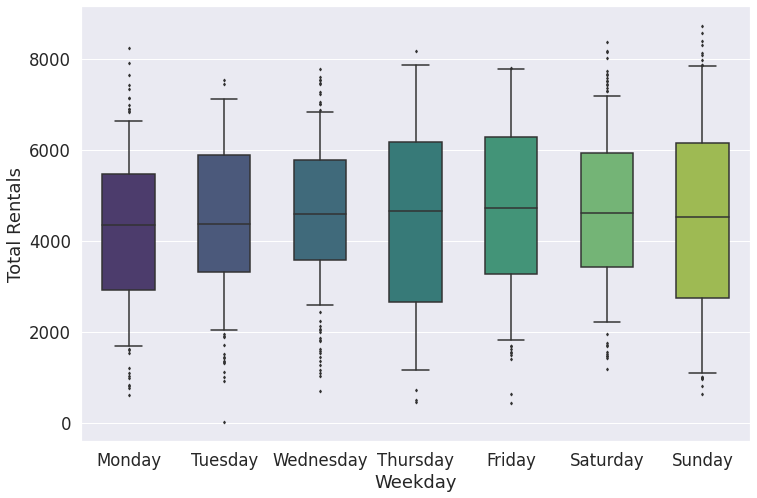

In [15]:
#darkgrid, whitegrid, dark, white, ticks
sns.set_style("darkgrid")
#paper, notebook, talk, poster
sns.set_context("notebook", font_scale=1.5)
pyplot.figure(figsize=(12,8))
ax = sns.boxplot(x="weekday", y="cnt", data=dataset, width=.55, whis=.5, saturation=.6, fliersize=2,
             notch=False, palette='viridis')
ax.set_xlabel("Weekday")
ax.set_ylabel("Total Rentals")
pyplot.xticks([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
pyplot.show()

Diferencia de alquieres entre los años 2011 y 2012.

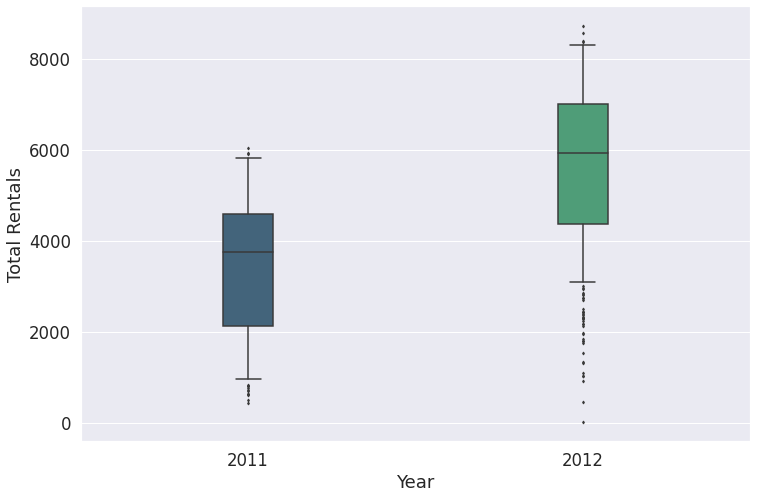

In [16]:
#darkgrid, whitegrid, dark, white, ticks
sns.set_style("darkgrid")
#paper, notebook, talk, poster
sns.set_context("notebook", font_scale=1.5)
pyplot.figure(figsize=(12,8))
ax = sns.boxplot(x="yr", y="cnt", data=dataset, width=.15, whis=.5, saturation=.6, fliersize=2,
             notch=False, palette='viridis')
pyplot.xticks([0, 1], ['2011', '2012'])
ax.set_xlabel("Year")
ax.set_ylabel("Total Rentals")
pyplot.show()

Total de alquieres por mes del año.

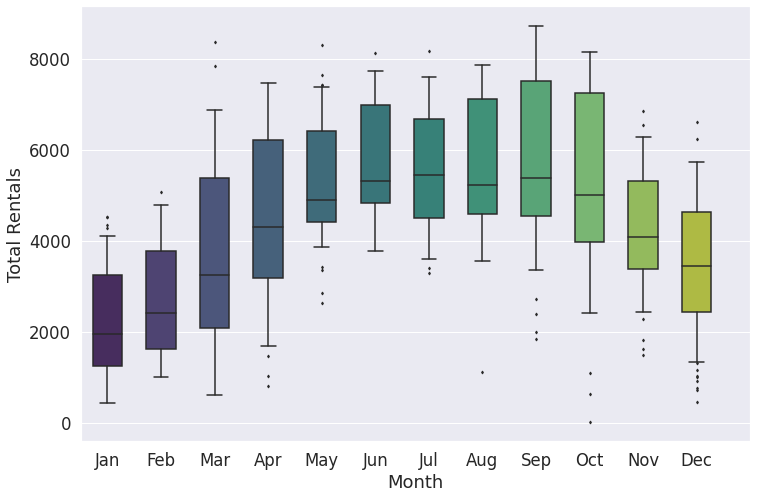

In [17]:
#darkgrid, whitegrid, dark, white, ticks
sns.set_style("darkgrid")
#paper, notebook, talk, poster
sns.set_context("notebook", font_scale=1.5)
pyplot.figure(figsize=(12,8))
ax = sns.boxplot(x="mnth", y="cnt", data=dataset, width=.55, whis=.5, saturation=.6, fliersize=2,
             notch=False, palette='viridis')
ax.set_xlabel("Month")
ax.set_ylabel("Total Rentals")
pyplot.xticks([0, 1, 2, 3, 4, 5, 6, 7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep','Oct','Nov', 'Dec'])
pyplot.show()

Cantidad de alquieres dependiendo de la temperatura, transformándola al formato de grados Celsios 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


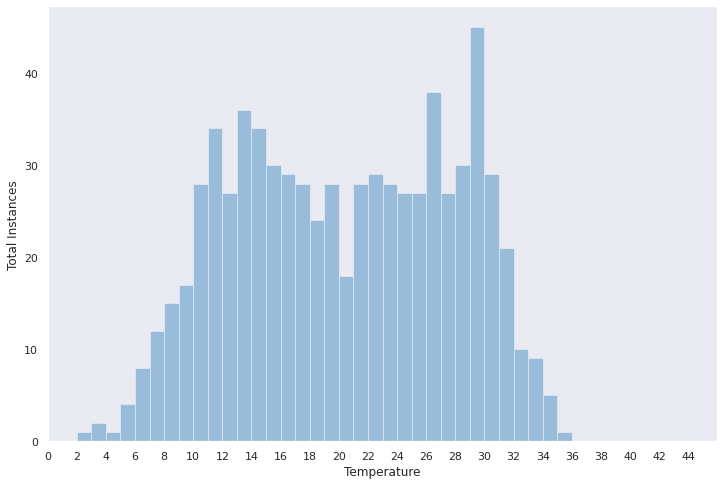

In [18]:
#darkgrid, whitegrid, dark, white, ticks
sns.set_style("dark")
pyplot.figure(figsize=(12,8))
#paper, notebook, talk, poster
sns.set_context('notebook')
pyplot.xlim(0, 46)
pyplot.xticks(np.arange(0, 46, 2))
bins = np.arange(0, 50, 1)
x = dataset['temp']
ax = sns.distplot(x, kde=False, bins=bins)
ax.set_xlabel("Temperature")
ax.set_ylabel("Total Instances")
pyplot.show()

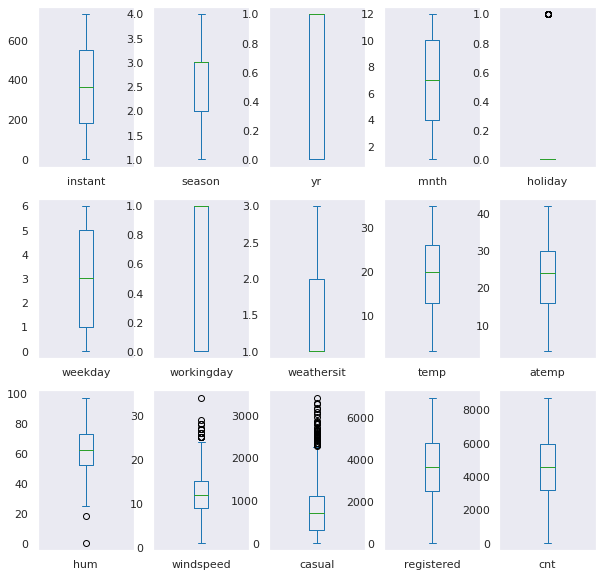

In [19]:
dataset.plot(kind='box',subplots=True, layout=(3,5), sharex=False, sharey=False, figsize=(10,10))
pyplot.show()

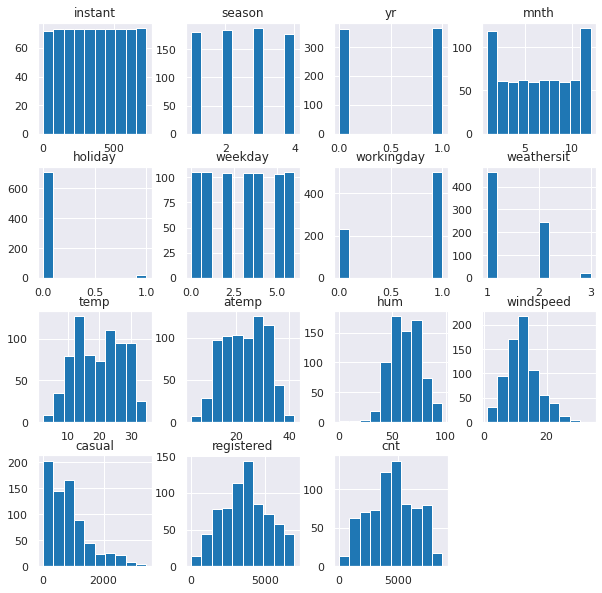

In [20]:
dataset.hist(figsize=(10,10))
pyplot.show()

Tanto las cajas de bigotes como los diagramas de cajas muestran datos como la distribución de las variables, su simetría y la existencia de valores atípicos. Se puede apreciar que tanto holiday, yr y workingday tienen un aspecto direfente al resto. Esto se debe a ser variables cuyos valores son 0 o 1 (yr podría extenderse, pero no es el caso de los datos leídos). Workingday y yr son idénticas, debido a que hay muchas instancias con ambos valores. En cambio, holiday es una línea y un círculo opuesto. Esto es que la gran mayoría de las instancias tienen holiday 0, y sólo unas pocas están a 1. Weathersit es también un poco diferente, pues no tiene el bigote inferior. Esto se debe a que la gran mayoría de las instancias tienen valores 1 y 2, y tan solo unas pocas tienen 3, y ninguna tiene 4 a pesar de ser uno de los posibles valores.

Las variables instant, season, mnth, weekday, temp, atemp, registered y cnt son todas muy parecidas, cuya distrubición es normal sin datos atípicos. Por el contrario, tanto hum, windspeed y casual tienen instancias fuera de rango.

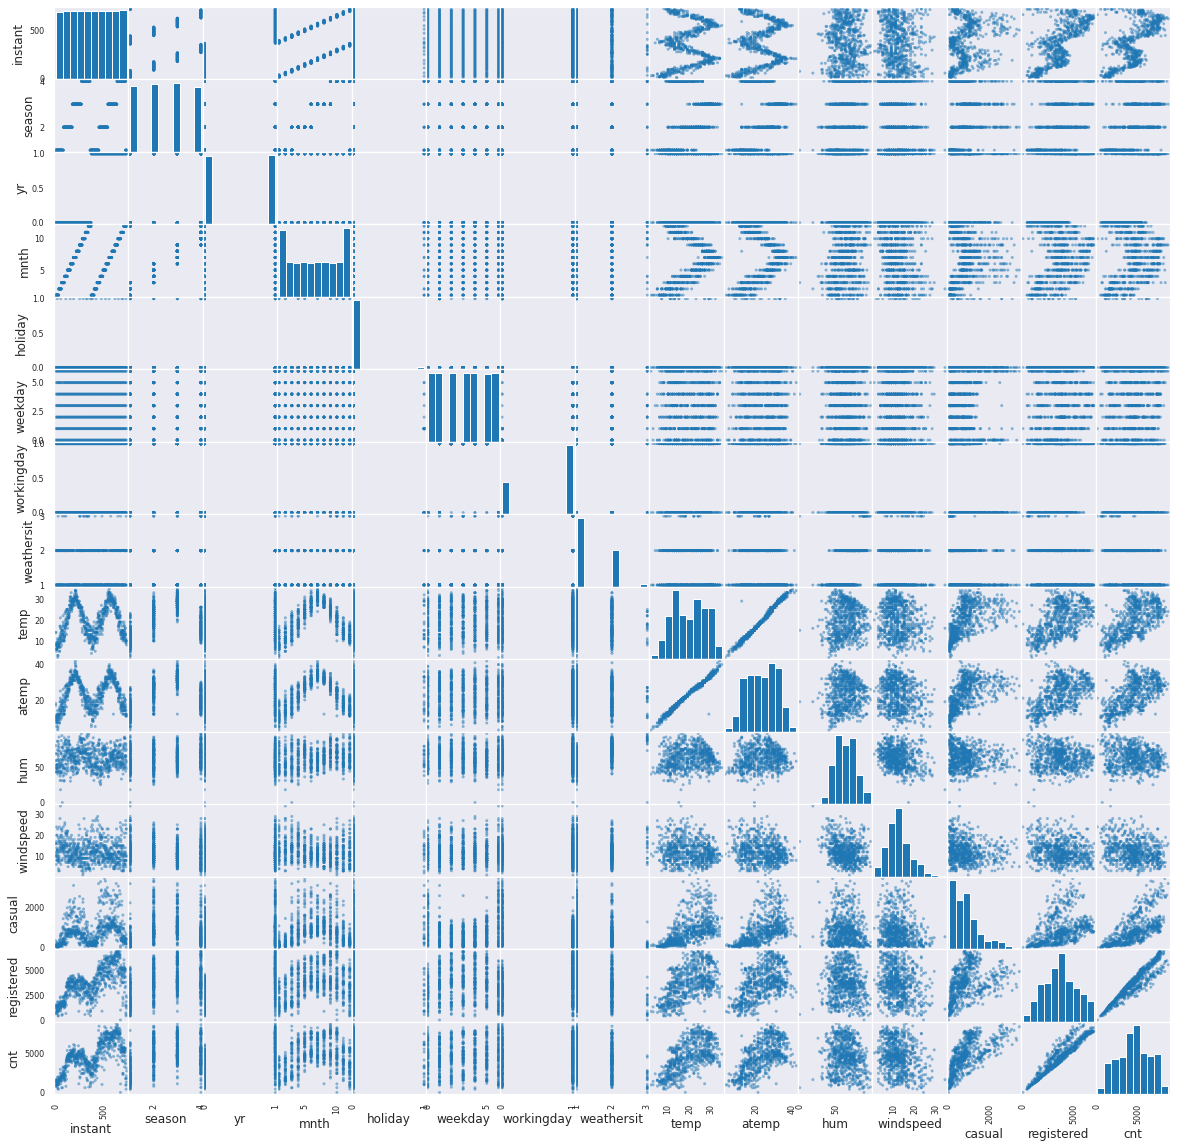

In [21]:
scatter_matrix(dataset, figsize=(20,20))
pyplot.show()

Las matrices de gráficos de dispersión sirven para ver la correlación entre variables. Podemos observar que temp y atemp tienen una alta correlación, de ahí que más adelante quite atemp de la modelización. Tambien hay correlación entre casual y registered con cnt, pues cnt es la suma de estas dos.

Ahora vamos a eliminar aquellas columnas no necesarias.

In [22]:
#instant, season, yr, dteday, weekday y holiday no hacen falta
dataset.drop('instant',axis=1,inplace=True)
dataset.drop('season',axis=1,inplace=True)
dataset.drop('yr',axis=1,inplace=True)
dataset.drop('dteday',axis=1,inplace=True) 
dataset.drop('weekday',axis=1,inplace=True)
dataset.drop('holiday',axis=1,inplace=True) 
#La variable atemp y temp tienen alta correlación
dataset = dataset.drop('atemp',axis=1)

Ahora vamos a preparar el modelado.

In [23]:
array = dataset.values
X = array[:, :-1]
y = array[:, -1]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.25, random_state=1, shuffle=True)

In [24]:
model = KNeighborsClassifier(n_neighbors=1)

In [25]:
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [26]:
print(model)

KNeighborsClassifier(n_neighbors=1)


In [27]:
print('Precisión: ', accuracy_score(Y_validation, predictions))

Precisión:  0.00546448087431694


In [28]:
print('Pruebas de precisión del modelo:')
print('Predicción: ', model.predict([[12, 1, 2, 0.215833, 0.5775, 0.154846, 439, 2290]]))
print("Dato real    ", y[-1])

print('Predicción: ', model.predict([[12, 0, 1, 0.255833, 0.483333,	 0.350754, 364, 1432]]))
print("Dato real    ", y[-2])

print('Predicción: ', model.predict([[12, 0, 2, 0.253333, 0.752917, 0.124383, 159, 1182]]))
print("Dato real    ", y[-3])

print('Predicción: ', model.predict([[1,	0, 2,	0.344167,	0.805833,	0.160446,	331,	654]]))
print("Dato real    ", y[0])

Pruebas de precisión del modelo:
Predicción:  [2729]
Dato real     2729
Predicción:  [1796]
Dato real     1796
Predicción:  [1349]
Dato real     1341
Predicción:  [801]
Dato real     985
